# CS506 Programming for Computing
**Team #03 Members:**

* Brooke Tischer
* En-Xiang Lin
* Hao Yan
* Rothpanhaseth Im

# PyTorch Tutorial: MNIST Classification

This tutorial walks through building a simple neural network with PyTorch to classify handwritten digits from the MNIST dataset.

We'll cover the following steps:
- Installing required packages
- Loading the MNIST dataset
- Defining a neural network
- Training the model
- Evaluating performance
- Making predictions




In [1]:
# Install required packages (if needed)
!pip install torch torchvision matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 47.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 821.0/821.0 MB 14.1 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 393.1/393.1 MB 30.1 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.9/8.9 MB 47.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 44.6 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 897.7/897.7 kB 32.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 571.0/571.0 MB 23.5 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.2/200.2 MB 54.1 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 39.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 57.3 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.2/158.2 MB 41.4 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.6/216.6 MB

## Step 1: Import Required Libraries

We import PyTorch, torchvision (for the dataset), and matplotlib for visualization.


In [2]:
import torch
from torch import nn
import torchvision
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt


## Step 2: Define Transformations and Load the MNIST Dataset

We'll normalize the images and convert them to tensors. Then we load the training and test datasets using torchvision.


In [3]:
# Define transformations
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))  # mean and std dev for MNIST
])

# Load training and test datasets
train_dataset = datasets.MNIST(root='data', train=True, transform=transform, download=True)
test_dataset = datasets.MNIST(root='data', train=False, transform=transform, download=True)

# Create data loaders
train_loader = DataLoader(dataset=train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=1000, shuffle=False)


100%|██████████| 9.91M/9.91M [00:00<00:00, 17.7MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 430kB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 4.36MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 6.73MB/s]


## Step 3: Visualize the Data

Let's take a look at some of the training images to understand what the model will be working with.


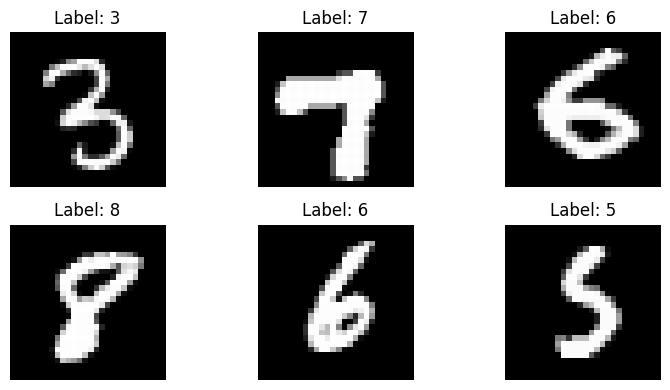

In [4]:
examples = enumerate(train_loader)
batch_idx, (example_data, example_targets) = next(examples)

plt.figure(figsize=(8, 4))
for i in range(6):
    plt.subplot(2, 3, i+1)
    plt.imshow(example_data[i][0], cmap="gray")
    plt.title(f"Label: {example_targets[i].item()}")
    plt.axis("off")
plt.tight_layout()
plt.show()


## Step 4: Define the Neural Network Model

We'll define a simple feedforward neural network using `nn.Module`. This model has one hidden layer with ReLU activation and outputs class scores for 10 digits (0–9).


In [5]:
class NeuralNet(nn.Module):
    def __init__(self):
        super(NeuralNet, self).__init__()
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(28*28, 128)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = self.flatten(x)
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x

# Instantiate model
model = NeuralNet()


## Step 5: Define the Loss Function and Optimizer

We'll use cross-entropy loss (standard for classification) and Adam as the optimizer.


In [6]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)


## Step 6: Train the Model

Now we'll train the model for a few epochs. In each epoch, we:
- Forward pass to get predictions
- Compute loss
- Backward pass to compute gradients
- Update weights

We'll print the loss after every 100 batches to track training progress.


In [7]:
def train(model, loader, loss_fn, optimizer, epochs=5):
    model.train()
    for epoch in range(epochs):
        total_loss = 0
        for batch_idx, (data, target) in enumerate(loader):
            # Forward pass
            output = model(data)
            loss = loss_fn(output, target)

            # Backward pass and optimization
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            total_loss += loss.item()
            if batch_idx % 100 == 0:
                print(f"Epoch {epoch+1}, Batch {batch_idx}, Loss: {loss.item():.4f}")
        print(f"Epoch {epoch+1} complete. Avg loss: {total_loss / len(loader):.4f}")

# Train for 5 epochs
train(model, train_loader, loss_fn, optimizer, epochs=5)


Epoch 1, Batch 0, Loss: 2.3471
Epoch 1, Batch 100, Loss: 0.3016
Epoch 1, Batch 200, Loss: 0.1525
Epoch 1, Batch 300, Loss: 0.2348
Epoch 1, Batch 400, Loss: 0.3131
Epoch 1, Batch 500, Loss: 0.2464
Epoch 1, Batch 600, Loss: 0.2492
Epoch 1, Batch 700, Loss: 0.1217
Epoch 1, Batch 800, Loss: 0.1757
Epoch 1, Batch 900, Loss: 0.2189
Epoch 1 complete. Avg loss: 0.2556
Epoch 2, Batch 0, Loss: 0.0525
Epoch 2, Batch 100, Loss: 0.0710
Epoch 2, Batch 200, Loss: 0.1968
Epoch 2, Batch 300, Loss: 0.1407
Epoch 2, Batch 400, Loss: 0.1179
Epoch 2, Batch 500, Loss: 0.0215
Epoch 2, Batch 600, Loss: 0.0992
Epoch 2, Batch 700, Loss: 0.0395
Epoch 2, Batch 800, Loss: 0.0773
Epoch 2, Batch 900, Loss: 0.0880
Epoch 2 complete. Avg loss: 0.1107
Epoch 3, Batch 0, Loss: 0.0571
Epoch 3, Batch 100, Loss: 0.1877
Epoch 3, Batch 200, Loss: 0.0257
Epoch 3, Batch 300, Loss: 0.0325
Epoch 3, Batch 400, Loss: 0.0445
Epoch 3, Batch 500, Loss: 0.2607
Epoch 3, Batch 600, Loss: 0.1670
Epoch 3, Batch 700, Loss: 0.1521
Epoch 3, Bat

## Step 7: Evaluate the Model

After training, we'll evaluate accuracy on the test dataset. We'll disable gradient tracking since we're not updating weights.


In [8]:
def evaluate(model, loader):
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for data, target in loader:
            output = model(data)
            _, predicted = torch.max(output.data, 1)
            total += target.size(0)
            correct += (predicted == target).sum().item()
    print(f"Test Accuracy: {100 * correct / total:.2f}%")

# Evaluate the trained model
evaluate(model, test_loader)


Test Accuracy: 97.41%


## Step 8: Make Predictions on New Data

We can now use the trained model to predict labels for new MNIST images.


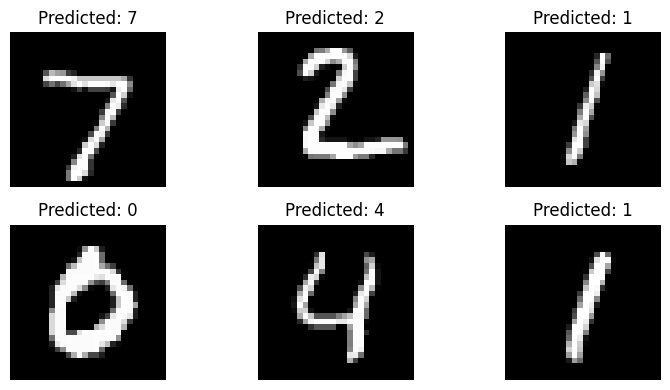

In [9]:
# Predict on a single batch
model.eval()
examples = enumerate(test_loader)
batch_idx, (example_data, example_targets) = next(examples)

with torch.no_grad():
    output = model(example_data)

# Show predictions
plt.figure(figsize=(8, 4))
for i in range(6):
    plt.subplot(2, 3, i+1)
    plt.imshow(example_data[i][0], cmap="gray")
    pred_label = output[i].argmax(dim=0).item()
    plt.title(f"Predicted: {pred_label}")
    plt.axis("off")
plt.tight_layout()
plt.show()


## Summary and Next Steps

In this tutorial, we built a simple feedforward neural network using PyTorch to classify handwritten digits from the MNIST dataset. We covered:

- Installing and importing required libraries
- Preprocessing and loading the MNIST dataset
- Visualizing training data
- Defining a neural network model using `nn.Module`
- Training the model with loss backpropagation and optimizer updates
- Evaluating accuracy on a test set
- Making predictions and visualizing the results

### Next Steps:

Here are a few ways we could extend this project:
- Replace the feedforward model with a Convolutional Neural Network (CNN) to boost accuracy
- Add support for training on GPU using `model.to('cuda')` if a GPU is available
- Log training/validation metrics with `TensorBoard` or `Matplotlib`
- Save and load trained models with `torch.save()` and `torch.load()`
- Try using a different dataset like FashionMNIST or CIFAR-10

This project gave us a hands-on introduction to using PyTorch for image classification. From here, we are ready to start building and experimenting with more complex architectures and tasks!
